### CNN TIME

In [1]:
import preprocessor.time_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess(True, True, True)

In [2]:
print(X_train.shape)

(2908, 18, 1280)


Load CNN model

In [3]:
from ia.model.cnn.time_cnn import TimeCNN
time_cnn = TimeCNN(input_shape=(X_train[0].shape))

In [4]:
time_cnn.compile()

In [5]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [6]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
12/12 [==============================] - 1s 44ms/step - loss: 0.7483 - accuracy: 0.5722 - val_loss: 1.2159 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 0.6422 - accuracy: 0.6554 - val_loss: 1.0279 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 27ms/step - loss: 0.5806 - accuracy: 0.6970 - val_loss: 0.7574 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.5272 - accuracy: 0.7270 - val_loss: 0.7066 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 26ms/step - loss: 0.4824 - accuracy: 0.7534 - val_loss: 0.8392 - val_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 0s 27ms/step - loss: 0.4285 - accuracy: 0.7930 - val_loss: 0.7823 - val_accuracy: 0.5000
Epoch 7/100
12/12 [==============================] - 0s 27ms/step - loss: 0.4052 - accuracy: 0.8061 - val_loss: 0.7560 - val_accuracy: 0.5000
Epoch 

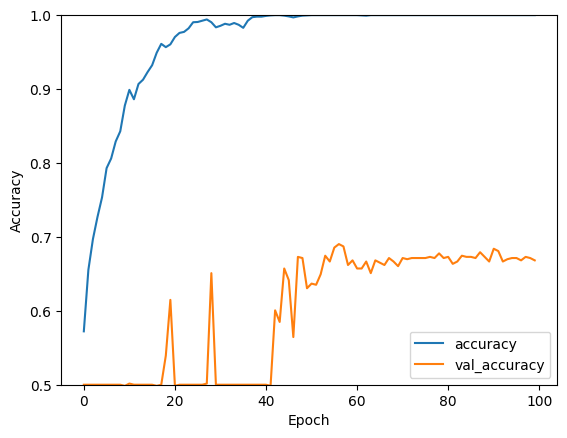

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [8]:
import numpy as np
predictions = time_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i]) + " | " +  "REAL: " + str(y_test[i]))

4/4 [==============================] - 0s 2ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: Fal

### METRICS:

In [9]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, time_cnn.name(), "time")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 47
True Negatives: 36
False Positives: 8
False Negatives: 19
total Samples: 110
Accuracy: 0.7545454545454545
Precision: 0.8545454545454545
Sensitivity: 0.7121212121212122
Specificity: 0.8181818181818182
TPR: 0.8545454545454545
FPR: 0.18181818181818182
F1-Score: 0.7327197595792636


ROC curve

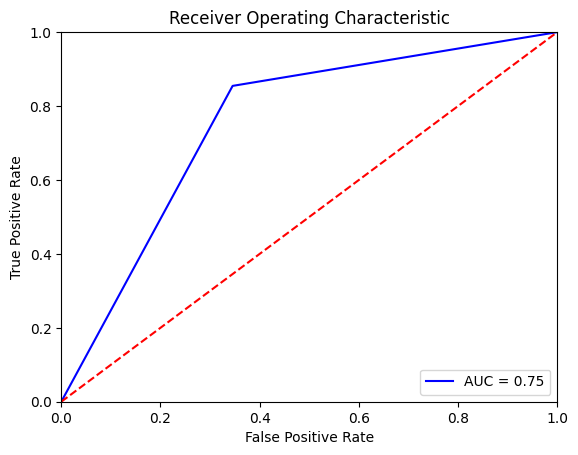

In [10]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()